PID Issues Notebook
* 26 October, 2024

Tutors:
* Dr. Christopher Lum
  * [University of Washington Webpage](http://faculty.washington.edu/lum/EducationalVideos.htm)
  * [Practical Implementation Issues with a PID Controller - YouTube](https://youtu.be/yr6om0e0oAQ?si=Sefee8Wn_NF5Xuda)
* Anthropic's AI Claude

The PID control algorithm is formally defined as:

```
u(t) = Kp * e(t) + Ki * ∫e(τ)dτ + Kd * de(t)/dt
```
We are going to examine issues associated with the derivative term of this equation

| Term/Symbol | Description |
|-------------|-------------|
| Derivative Term | Responds to the rate of change of error (`Kd * de(t)/dt`) |
| `Kd` | Derivative gain |
| `e(t)` | Error signal at time t |



First we will generate a python script that graphs cosine and sine waves over a fixed interval

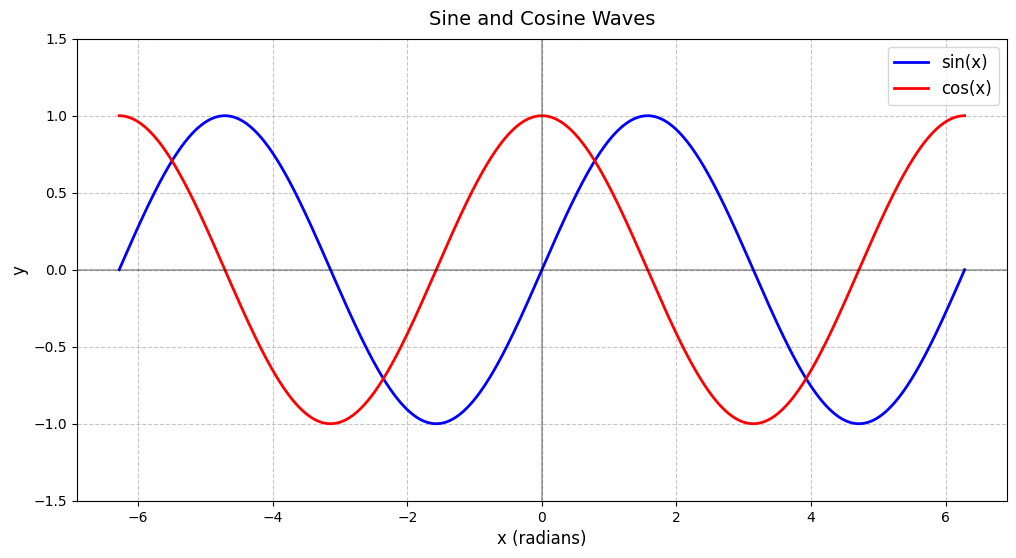

In [ ]:
"""
Abstract:
This script generates and visualizes sine and cosine waves over a specified interval.
It demonstrates the periodic nature of these fundamental trigonometric functions,
plotting them on the same coordinate system for comparison. The script uses NumPy
for calculations and Matplotlib for visualization, with customized styling to
enhance readability and visual appeal.

Author: Claude
Date: October 26, 2024
"""

import numpy as np
import matplotlib.pyplot as plt

def plot_trig_waves(start=-2*np.pi, end=2*np.pi, points=1000):
    """
    Generate and plot sine and cosine waves over a specified interval.

    Parameters:
    -----------
    start : float
        Starting x-value (default: -2π)
    end : float
        Ending x-value (default: 2π)
    points : int
        Number of points to calculate (default: 1000)
    """
    # Generate evenly spaced x values
    x = np.linspace(start, end, points)

    # Calculate sine and cosine values
    sin_y = np.sin(x)
    cos_y = np.cos(x)

    # Create a new figure with specified size
    plt.figure(figsize=(12, 6))

    # Plot both waves
    plt.plot(x, sin_y, label='sin(x)', color='blue', linewidth=2)
    plt.plot(x, cos_y, label='cos(x)', color='red', linewidth=2)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add title and labels
    plt.title('Sine and Cosine Waves', fontsize=14, pad=10)
    plt.xlabel('x (radians)', fontsize=12)
    plt.ylabel('y', fontsize=12)

    # Add legend
    plt.legend(fontsize=12)

    # Add horizontal line at y=0
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Add vertical line at x=0
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Set y-axis limits for better visualization
    plt.ylim(-1.5, 1.5)

    # Show the plot
    plt.show()

# Execute the function with default parameters
if __name__ == "__main__":
    plot_trig_waves()

Then we add random noise to the sine wave

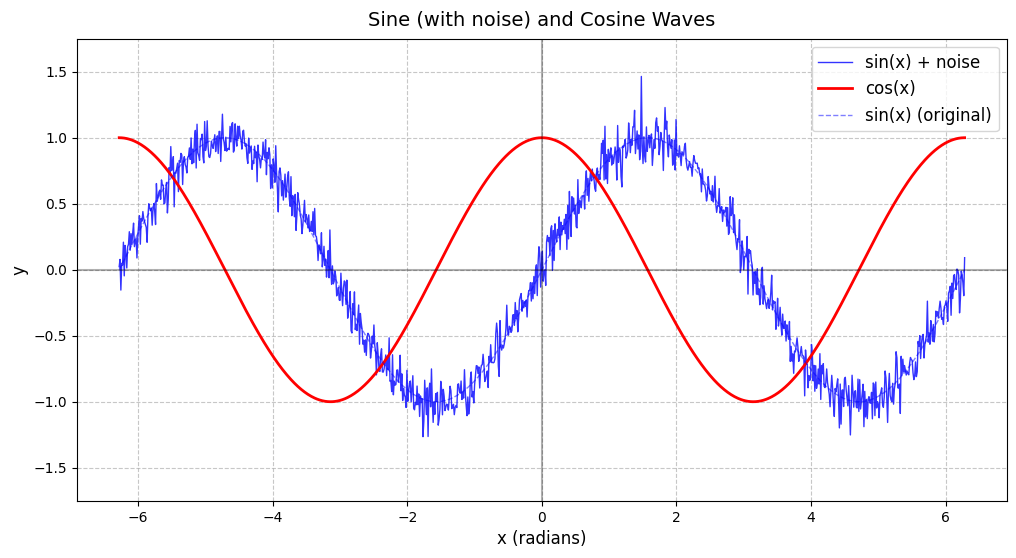

In [ ]:
"""
Abstract:
This script generates and visualizes sine and cosine waves over a specified interval.
The sine wave includes random noise to demonstrate signal perturbation, while the
cosine wave remains clean for comparison. The script uses NumPy for calculations
and noise generation, and Matplotlib for visualization, with customized styling to
enhance readability and visual appeal.

Author: Claude
Date: October 26, 2024
"""

import numpy as np
import matplotlib.pyplot as plt

def plot_trig_waves(start=-2*np.pi, end=2*np.pi, points=1000, noise_amplitude=0.1):
    """
    Generate and plot sine (with noise) and cosine waves over a specified interval.

    Parameters:
    -----------
    start : float
        Starting x-value (default: -2π)
    end : float
        Ending x-value (default: 2π)
    points : int
        Number of points to calculate (default: 1000)
    noise_amplitude : float
        Amplitude of random noise added to sine wave (default: 0.1)
    """
    # Generate evenly spaced x values
    x = np.linspace(start, end, points)

    # Calculate sine and cosine values
    sin_y = np.sin(x)
    cos_y = np.cos(x)

    # Generate random noise and add it to the sine wave
    noise = np.random.normal(0, noise_amplitude, points)
    noisy_sin_y = sin_y + noise

    # Create a new figure with specified size
    plt.figure(figsize=(12, 6))

    # Plot both waves
    plt.plot(x, noisy_sin_y, label='sin(x) + noise', color='blue', linewidth=1, alpha=0.8)
    plt.plot(x, cos_y, label='cos(x)', color='red', linewidth=2)

    # Plot the original sine wave for reference
    plt.plot(x, sin_y, label='sin(x) (original)', color='blue',
            linewidth=1, linestyle='--', alpha=0.5)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add title and labels
    plt.title('Sine (with noise) and Cosine Waves', fontsize=14, pad=10)
    plt.xlabel('x (radians)', fontsize=12)
    plt.ylabel('y', fontsize=12)

    # Add legend
    plt.legend(fontsize=12)

    # Add horizontal line at y=0
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Add vertical line at x=0
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Set y-axis limits to accommodate noise
    plt.ylim(-1.75, 1.75)

    # Show the plot
    plt.show()

# Execute the function with default parameters
if __name__ == "__main__":
    plot_trig_waves()